# Data Mining Versuch Document Classification
* Autor: Prof. Dr. Johannes Maucher
* Datum: 06.11.2015

[Übersicht Ipython Notebooks im Data Mining Praktikum](Data Mining Praktikum.html)

# Einführung
## Lernziele:
In diesem Versuch sollen Kenntnisse in folgenden Themen vermittelt werden:

* Dokumentklassifikation: Klassifikation von Dokumenten, insbesondere Emails und RSS Feed
* Naive Bayes Classifier: Weit verbreitete Klassifikationsmethode, welche unter bestimmten Randbedingungen sehr gut skaliert.


## Theorie zur Vorbereitung
### Parametrische Klassifikation und Naive Bayes Methode
Klassifikatoren müssen zu einer gegebenen Eingabe $\underline{x}$ die zugehörige Klasse $C_i$ bestimmen. Mithilfe der Wahrscheinlichkeitstheorie kann diese Aufgabe wie folgt beschrieben werden: Bestimme für alle möglichen Klassen $C_i$ die bedingte Wahrscheinlichkeit $P(C_i | \underline{x})$, also die Wahrscheinlichkeit, dass die gegebene Eingabe $\underline{x}$ in Klasse $C_i$ fällt. Wähle dann die Klasse aus, für welche diese Wahrscheinlichkeit maximal ist.

Die Entscheidungsregeln von Klassifikatoren können mit Methoden des ""überwachten Lernens"" aus Trainingsdaten ermittelt werden. Im Fall des **parametrischen Lernens** kann aus den Trainingsdaten die sogenannte **Likelihood-Funktion** $p(\underline{x} \mid C_i)$ bestimmt werden. _Anmerkung:_ Allgemein werden mit $p(...)$ kontinuierliche Wahrscheinlichkeitsfunktionen und mit $P(...)$ diskrete Wahrscheinlichkeitswerte bezeichnet. 

Mithilfe der **Bayes-Formel**
$$
P(C_i \mid \underline{x}) = \frac{p(\underline{x} \mid C_i) \cdot P(C_i)}{p(\underline{x})}
$$

kann aus der Likelihood die **a-posteriori-Wahrscheinlichkeit $P(C_i \mid \underline{x})$** berechnet werden. Darin wird $P(C_i)$ die **a-priori-Wahrscheinlichkeit** und $p(\underline{x})$ die **Evidenz** genannt. Die a-priori-Wahrscheinlichkeit kann ebenfalls aus den Trainingsdaten ermittelt werden. Die Evidenz ist für die Klassifikationsentscheidung nicht relevant, da sie für alle Klassen $C_i$ gleich groß ist.

Die Berechnung der Likelihood-Funktion $p(\underline{x} \mid C_i)$ ist dann sehr aufwendig, wenn $\underline{x}=(x_1,x_2,\ldots,x_Z)$ ein Vektor von voneinander abhängigen Variablen $x_i$ ist. Bei der **Naive Bayes Classification** wird jedoch von der vereinfachenden Annahme ausgegangen, dass die Eingabevariabeln $x_i$ voneinander unabhängig sind. Dann vereinfacht sich die bedingte Verbundwahrscheinlichkeits-Funktion $p(x_1,x_2,\ldots,x_Z \mid C_i)$ zu:

$$
p(x_1,x_2,\ldots,x_Z \mid C_i)=\prod\limits_{j=1}^Z p(x_j | C_i)
$$

### Anwendung der Naive Bayes Methode in der Dokumentklassifikation
Auf der rechten Seite der vorigen Gleichung stehen nur noch von den jeweils anderen Variablen unabhängige bedingte Wahrscheinlichkeiten. Im Fall der Dokumentklassifikation sind die einzelnen Worte die Variablen, d.h. ein Ausdruck der Form $P(x_j | C_i)$ gibt an mit welcher Wahrscheinlichkeit ein Wort $x_j=w$ in einem Dokument der Klasse $C_i$ vorkommt. 
Die Menge aller Variablen $\left\{x_1,x_2,\ldots,x_Z \right\}$ ist dann die Menge aller Wörter im Dokument. Damit gibt die linke Seite in der oben gegebenen Gleichung die _Wahrscheinlichkeit, dass die Wörter $\left\{x_1,x_2,\ldots,x_Z \right\}$ in einem Dokument der Klasse $C_i$ vorkommen_ an.

Für jedes Wort _w_ wird aus den Trainingsdaten die Wahrscheinlichkeit $P(w|G)$, mit der das Wort in Dokumenten der Kategorie _Good_ und die Wahrscheinlichkeit $P(w|B)$ mit der das Wort in Dokumenten der Kategorie _Bad_ auftaucht ermittelt. Trainingsdokumente werden in der Form

$$
tD=(String,Category)
$$
eingegeben. 

Wenn 

* mit der Variable $fc(w,cat)$ die Anzahl der Trainingsdokumente in Kategorie $cat$ in denen das Wort $w$ enthalten ist
* mit der Variable $cc(cat)$ die Anzahl der Trainingsdokumente in Kategorie $cat$ 

gezählt wird, dann ist 

$$
P(w|G)=\frac{fc(w,G)}{cc(G)} \quad \quad P(w|B)=\frac{fc(w,B)}{cc(B)}.
$$

Wird nun nach der Eingabe von $L$ Trainingsdokumenten ein neu zu klassifizierendes Dokument $D$ eingegeben und sei $W(D)$ die Menge aller Wörter in $D$, dann berechnen sich unter der Annahme, dass die Worte in $W(D)$ voneinander unabhängig sind (naive Bayes Annahme) die a-posteriori Wahrscheinlichkeiten zu:

$$
P(G|D)=\frac{\left( \prod\limits_{w \in W(D)} P(w | G) \right) \cdot P(G)}{p(D)}
$$
und
$$
P(B|D)=\frac{\left( \prod\limits_{w \in W(D)} P(w | B) \right) \cdot P(B)}{p(D)}.
$$

Die hierfür notwendigen a-priori-Wahrscheinlichkeiten berechnen sich zu 

$$
P(G)=\frac{cc(G)}{L}
$$
und
$$
P(B)=\frac{cc(B)}{L}
$$

Die Evidenz $p(D)$ beeinflusst die Entscheidung nicht und kann deshalb ignoriert werden.


## Vor dem Versuch zu klärende Fragen


1. Wie wird ein Naive Bayes Classifier trainiert? Was muss beim Training für die spätere Klassifikation abgespeichert werden?
2. Wie teilt ein Naiver Bayes Classifier ein neues Dokument ein?
3. Welche naive Annahme liegt dem Bayes Classifier zugrunde? Ist diese Annahme im Fall der Dokumentklassifikation tatsächlich gegeben?
4. Betrachten Sie die Formeln für die Berechnung von $P(G|D)$ und $P(B|D)$. Welches Problem stellt sich ein, wenn in der Menge $W(D)$ ein Wort vorkommt, das nicht in den Trainingsdaten der Kategorie $G$ vorkommt und ein anderes Wort aus $W(D)$ nicht in den Trainingsdaten der Kategorie $B$ enthalten ist? Wie könnte dieses Problem gelöst werden? 



1. Der Classifier bekommt eine Menge an gelabelte Dokumenten. Für jedes Wort, das in den Trainingsdokumenten vorkommt, merkt sich der Classifier, wie oft es in einem Dokument der Kategorie K vorgekommen ist.
2. Er berechnet aus allen bekannten Wörtern die Wahrscheinlichkeiten für alle ihm bekannten Kategorien. Die Kategorie mit der höchsten Wahrscheinlichkeit wird dem Dokument dann zugeteilt.
3. Der Classifier nimmt an, dass es keine Abhängigkeiten unter der Wörter gibt. Das stimmt allerdings, da Wörter voneinander abhängen.
4. Wenn es nicht vorkommt, bekommt es die Wahrscheinlichkeit 0, wodurch dann die Multiplikation 0 wird. Für nicht vorkommende Wörter, könnte einfach ein Defaultwert zurückgegeben werden, zB 50%.

# Durchführung
## Feature Extraction/ -Selection

**Aufgabe:**
Implementieren Sie eine Funktion _getwords(doc)_, der ein beliebiges Dokument in Form einer String-Variablen übergeben wird. In der Funktion soll der String in seine Wörter zerlegt und jedes Wort in _lowercase_ transformiert werden. Wörter, die weniger als eine untere Grenze von Zeichen (z.B. 3) oder mehr als eine obere Grenze von Zeichen (z.B. 20) enthalten, sollen ignoriert werden. Die Funktion soll ein dictionary zurückgeben, dessen _Keys_ die Wörter sind. Die _Values_ sollen für jedes Wort zunächst auf $1$ gesetzt werden.

**Tipp:** Benutzen Sie für die Zerlegung des Strings und für die Darstellung aller Wörter mit ausschließlich kleinen Buchstaben die Funktionen _split(), strip('sep')_ und _lower()_ der Klasse _String_.  


In [1]:
bsp = '''Bavaria ipsum dolor sit amet Breihaus i sog ja nix, i red ja bloß, is ma Wuascht. Hoid a Hoiwe wolpern wea ko, dea ko guad fensdaln hoggd: Gschicht vasteh kimmt Edlweiss, sei. Samma Gaudi und sei schüds nei Stubn naa jo mei a so a Schmarn wuid, Baamwach! Jodler Kaiwe Charivari Haberertanz Baamwach, Ledahosn Sepp middn pfiad de Blosmusi nomoi. Nomoi heid gfoids ma sagrisch guad jo leck mi Klampfn: Auffi obandln da wann griagd ma nacha wos z’dringa i, Radi trihöleridi dijidiholleri. Lem und lem lossn hob gfreit mi pfenningguat mim jo leck mi singan. Charivari obandeln wos, Graudwiggal. Schorsch a ganze Vergeltsgott, i.'''

In [2]:
import re
def getWords(doc):
    strings = doc.split()
    deleted = []
    for i in range(len(strings)):
        strings[i] = re.sub(r'\W+' , '',strings[i].strip(' ,.!?').lower())
        if 20 > len(strings[i]) > 2:
            deleted.append(strings[i])
    return deleted

## Classifier

**Aufgabe:**
Implementieren Sie den Naive Bayes Classifier für die Dokumentklassifikation. Es bietet sich an die Funktionalität des Klassifikators und das vom Klassifikator gelernte Wissen in einer Instanz einer Klasse _Classifier_ zu kapseln. In diesem Fall kann wie folgt vorgegangen werden:

* Im Konstruktor der Klasse wird je ein Dictionary für die Instanzvariablen _fc_ und _cc_ (siehe oben) initialisiert. Dabei ist _fc_ ein verschachteltes Dictionary. Seine Keys sind die bisher gelernten Worte, die Values sind wiederum Dictionaries, deren Keys die Kategorien _Good_ und _Bad_ sind und deren Values zählen wie häufig das Wort bisher in Dokumenten der jeweiligen Kategorie auftrat. Das Dictionary _cc_ hat als Keys die Kategorien _Good_ und _Bad_. Die Values zählen wie häufig Dokumente der jeweiligen Kategorien bisher auftraten.
* Im Konstruktor wird ferner der Instanzvariablen _getfeatures_ die Funktion _getwords()_ übergeben. Die Funktion _getwords()_ wurde bereits zuvor ausserhalb der Klasse definiert. Sinn dieses Vorgehens ist, dass andere Varianten um Merkmale aus Dokumenten zu extrahieren denkbar sind. Diese Varianten könnten dann ähnlich wie die _getwords()_-Funktion ausserhalb der Klasse definiert und beim Anlegen eines _Classifier_-Objekts der Instanzvariablen _getfeatures_ übergeben werden.  
* Der Methode _incf(self,f,cat)_ wird ein Wort _f_ und die zugehörige Kategorie _cat_ des Dokuments in welchem es auftrat übergeben. In der Methode wird der _fc_-Zähler angepasst.
* Der Methode _incc(self,cat)_ wird die Kategorie _cat_ des gerade eingelesenen Dokuments übergeben. In der Methode wird der _cc_-Zähler angepasst.
* Die Methode _fcount(self,f,cat)_ gibt die Häufigkeit des Worts _f_ in den Dokumenten der Kategorie _cat_ zurück.
* Die Methode _catcount(self,cat)_ gibt die Anzahl der Dokumente in der Kategorie _cat_ zurück.
* Die Methode _totalcount(self)_ gibt die Anzahl aller Dokumente zurück.
* Der Methode _train(self,item,cat)_ wird ein neues Trainingselement, bestehend aus der Betreffzeile (_item_) und der entsprechenden Kategorisierung (_cat_) übergeben. Der String _item_ wird mit der Instanzmethode _getfeatures_ (Diese referenziert _getwords()_) in Worte zerlegt. Für jedes einzelne Wort wird dann _incf(self,f,cat)_ aufgerufen. Ausserdem wird für das neue Trainingsdokument die Methode _incc(self,cat)_ aufgerufen.
* Die Methode _fprob(self,f,cat)_ berechnet die bedingte Wahrscheinlichkeit $P(f | cat)$ des Wortes _f_ in der Kategorie _cat_ entsprechend der oben angegebenen Formeln, indem sie den aktuellen Stand des Zählers _fc(f,cat)_ durch den aktuellen Stand des Zählers _cc(cat)_ teilt.   
* Die Methode _fprob(self,f,cat)_ liefert evtl. ungewollt extreme Ergebnisse, wenn noch wenig Wörter im Klassifizierer verbucht sind. Kommt z.B. ein Wort erst einmal in den Trainingsdaten vor, so wird seine Auftrittswahrscheinlichkeit in der Kategorie in welcher es nicht vorkommt gleich 0 sein. Um extreme Wahrscheinlichkeitswerte im Fall noch selten vorkommender Werte zu vermeiden, soll zusätzlich zur Methode _fprob(self,f,cat)_ die Methode _weightedprob(self,f,cat)_ implementiert und angewandt werden. Der von ihr zurückgegebene Wahrscheinlichkeitswert könnte z.B. wie folgt berechnet werden:$$wprob=\frac{initprob+count \cdot fprob(self,f,cat)}{1+count},$$ wobei $initprob$ ein initialer Wahrscheinlichkeitswert (z.B. 0.5) ist, welcher zurückgegeben werden soll, wenn das Wort noch nicht in den Trainingsdaten aufgetaucht ist. Die Variable $count$ zählt wie oft das Wort $f$ bisher in den Trainingsdaten auftrat. Wie zu erkennen ist, nimmt der Einfluss der initialen Wahrscheinlichkeit ab, je häufiger das Wort in den Trainingsdaten auftrat.
* Nach dem Training soll ein beliebiges neues Dokument (Text-String) eingegeben werden können. Für dieses soll mit der Methode _prob(self,item,cat)_ die a-posteriori-Wahrscheinlichkeit $P(cat|item)$ (Aufgrund der Vernachlässigung der Evidenz handelt es sich hierbei genaugenommen um das Produkt aus a-posteriori-Wahrscheinlichkeit und Evidenz), mit der das Dokument _item_ in die Kategorie _cat_ fällt berechnet werden. Innerhalb der Methode _prob(self,item,cat)_ soll zunächst die Methode _weightedprob(self,f,cat)_ für alle Wörter $f$ im Dokument _item_ aufgerufen werden. Die jeweiligen Rückgabewerte von _weightedprob(self,f,cat)_ werden multipliziert. Das Produkt der Rückgabewerte von _weightedprob(self,f,cat)_ über alle Wörter $f$ im Dokument muss schließlich noch mit der a-priori Wahrscheinlichkeit $P(G)$ bzw. $P(B)$ entsprechend der oben aufgeführten Formeln multipliziert werden. Das Resultat des Produkts wird an das aufrufende Programm zurück gegeben, die Evidenz wird also vernachlässigt (wie oben begründet).



Ein Dokument _item_ wird schließlich der Kategorie _cat_ zugeteilt, für welche die Funktion _prob(self,item,cat)_ den höheren Wert zurück gibt. Da die Rückgabewerte in der Regel sehr klein sind, werden in der Regel folgende Werte angezeigt. Wenn mit $g$ der Rückgabewert von _prob(self,item,cat=G)_ und mit $b$ der Rückgabewert von _prob(self,item,cat=B)_ bezeichnet wird dann ist die Wahrscheinlichkeit, dass $item$ in die Kategorie $G$ fällt, gleich:
$$
\frac{g}{g+b}
$$
und die Wahrscheinlichkeit, dass $item$ in die Kategorie $B$ fällt, gleich:
$$
\frac{b}{g+b}
$$

In [3]:
GOOD = 'good'
BAD = 'bad'

class Classifier():
    def __init__(self, getfeatures=getWords):
        self.fc = dict()
        self.cc = {GOOD: 0, BAD: 0}
        self.getfeatures = getfeatures
    
    def incf(self, f, cat):
        if not f in self.fc:
            self.fc[f] = {GOOD: 0, BAD: 0}
        self.fc[f][cat] += 1 
        
    def incc(self, cat):
        self.cc[cat] += 1
    
    def fcount(self, f, cat):
        if f in self.fc:
            return self.fc[f][cat]
        else:
            return 0

    def catcount(self, cat):
        return self.cc[cat]
    
    def totalcount(self):
        return self.cc[GOOD] + self.cc[BAD]
    
    def train(self, item, cat):
        for feature in self.getfeatures(item):
            self.incf(feature, cat)
        self.incc(cat)
        
    def fprob(self, f, cat):
        return float( self.fcount(f, cat) ) / self.catcount(cat) 
    
    def wprob(self, f, cat):
        count = self.fcount( f, GOOD) + self.fcount( f, BAD)
        return ( 0.5 + count * self.fprob(f, cat) ) / ( 1 + count )
    
    def prob(self, item, cat):
        propability = 1.0
        for feature in self.getfeatures(item):
            propability = propability * self.wprob(feature, cat)             
        return propability * self.catcount(cat) / self.totalcount()
        
    def classification(self, item):
        final_G, final_B = self.getPropabilities(item)

        if final_G > final_B:
            return GOOD
        elif final_G < final_B:
            return BAD
        else:
            print "ERROR G=B"
            return None
        
    def getPropabilities(self, item):
        prob_G = self.prob(item, GOOD)
        prob_B = self.prob(item, BAD)
        
        final_prob_G = prob_G / ( prob_G + prob_B )
        final_prob_B = prob_B / ( prob_G + prob_B )
        return ( final_prob_G, final_prob_B )


## Test

**Aufgabe:**
Instanzieren Sie ein Objekt der Klasse _Classifier_ und übergeben Sie der _train()_ Methode dieser Klasse mindestens 10 kategorisierte Dokumente (Betreffzeilen als Stringvariablen zusammen mit der Kategorie Good oder Bad). Definieren Sie dann ein beliebig neues Dokument und berechnen Sie für dieses die Kategorie, in welches es mit größter Wahrscheinlichkeit fällt. Benutzen Sie für den Test das in 
[NLP Vorlesung Document Classification](https://www.mi.hdm-stuttgart.de/mib/studium/intern/skripteserver/skripte/NaturalLanguageProcessing/WS1415/03TextClassification.pdf)
ausführlich beschriebene Beispiel zu implementieren. Berechnen Sie die Klassifikatorausgabe des Satzes _the money jumps_.

In [4]:
a = ("nobody owns the water", GOOD)
b = ("the quick rabbit jumps fences", GOOD)
c = ("buy pharmaceuticals now", BAD)
d = ("make quick money at the online casino", BAD)
e = ("the quick brown fox jumps", GOOD)
f = ("next meeting is at night", GOOD)
g = ("meeting with your superstar", BAD)
h = ("money like water", BAD)
i = ("jumps over you", GOOD)
j = ("cheap viagra now", BAD)
docs = [a,b,c,d,e,f,g,h,i,j]

In [5]:
classifier = Classifier()
for doc in docs:
    classifier.train(*doc)

In [6]:
print classifier.classification("money jumps")



good


## Klassifikation von RSS Newsfeeds
Mit dem unten gegebenen Skript werden Nachrichten verschiedener Newsserver geladen und als String abgespeichert.

**Aufgaben:**
1. Trainieren Sie Ihren Naive Bayes Classifier mit allen Nachrichten der in den Listen _trainTech_ und _trainNonTech_ definierten Servern. Weisen Sie für das Training allen Nachrichten aus _trainTech_ die Kategorie _Tech_ und allen Nachrichten aus _trainNonTech_ die Kategorie _NonTech_ zu.
2. Nach dem Training sollen alle Nachrichten aus der Liste _test_ vom Naive Bayes Classifier automatisch klassifiziert werden. Gehen Sie davon aus, dass alle Nachrichten von [http://rss.golem.de/rss.php?r=sw&feed=RSS0.91](http://rss.golem.de/rss.php?r=sw&feed=RSS0.91) tatsächlich von der Kategorie _Tech_ sind und alle Nachrichten von den beiden anderen Servern in der Liste _test_ von der Kategorie _NonTech_ sind. Bestimmen Sie die _Konfusionsmatrix_ und die _Accuracy_ sowie für beide Klassen _Precision, Recall_ und _F1-Score_. Diese Qualitätsmetriken sind z.B. in [NLP Vorlesung Document Classification](https://www.mi.hdm-stuttgart.de/mib/studium/intern/skripteserver/skripte/NaturalLanguageProcessing/WS1415/03TextClassification.pdf) definiert.
3. Diskutieren Sie das Ergebnis
4. Wie könnte die Klassifikationsgüte durch Modifikation der _getwords()_-Methode verbessert werden? Implementieren Sie diesen Ansatz und vergleichen Sie das Ergebnis mit dem des ersten Ansatzes.

In [64]:
import feedparser


def stripHTML(h): 
    p=''
    s=0
    for c in h:
        if c=='<': 
            s=1
        elif c=='>':
            s=0
            p+=' '
        elif s==0:
            p+=c
    return p


trainTech=['http://rss.chip.de/c/573/f/7439/index.rss',
           #'http://feeds.feedburner.com/netzwelt',
           'http://rss1.t-online.de/c/11/53/06/84/11530684.xml',
           'http://www.computerbild.de/rssfeed_2261.xml?node=13',
           'http://www.heise.de/newsticker/heise-top-atom.xml']

trainNonTech=['http://newsfeed.zeit.de/index',
              'http://newsfeed.zeit.de/wirtschaft/index',
              'http://www.welt.de/politik/?service=Rss',
              'http://www.spiegel.de/schlagzeilen/tops/index.rss',
              'http://www.sueddeutsche.de/app/service/rss/alles/rss.xml',
              'http://www.faz.net/rss/aktuell/'
              ]
testTech=["http://rss.golem.de/rss.php?r=sw&feed=RSS0.91"]

testNonTech=[
          'http://newsfeed.zeit.de/politik/index',  
          'http://www.welt.de/?service=Rss'
           ]

countnews={}
countnews['tech']=0
countnews['nontech']=0
countnews['testTech']=0
countnews['testNonTech']=0

print "--------------------News from trainTech------------------------"
techTexts =[]
for feed in trainTech:
    print "*"*30
    print feed
    f=feedparser.parse(feed)
    for e in f.entries: 
        print '\n---------------------------'
        fulltext=stripHTML(e.title+' '+e.description)
        print fulltext
        techTexts.append(fulltext)
        countnews['tech']+=1
print "----------------------------------------------------------------"
print "----------------------------------------------------------------"
print "----------------------------------------------------------------"

print "--------------------News from trainNonTech------------------------"
nonTechTexts = []
for feed in trainNonTech:
    print "*"*30
    print feed
    f=feedparser.parse(feed)
    for e in f.entries:
        print '\n---------------------------'
        fulltext=stripHTML(e.title+' '+e.description)
        nonTechTexts.append(fulltext)
        print fulltext
        countnews['nontech']+=1
print "----------------------------------------------------------------"
print "----------------------------------------------------------------"
print "----------------------------------------------------------------"

print "--------------------News from test Tech------------------------"
testTextsTech = []
for feed in testTech:
    print "*"*30
    print feed
    f=feedparser.parse(feed)
    for e in f.entries:
        print '\n---------------------------'
        fulltext=stripHTML(e.title+' '+e.description)
        testTextsTech.append(fulltext)
        print fulltext
        countnews['testTech']+=1
print "----------------------------------------------------------------"
print "----------------------------------------------------------------"
print "----------------------------------------------------------------"

print "--------------------News from test nonTech------------------------"
testTextsNonTech = []
for feed in testNonTech:
    print "*"*30
    print feed
    f=feedparser.parse(feed)
    for e in f.entries:
        print '\n---------------------------'
        fulltext=stripHTML(e.title+' '+e.description)
        testTextsNonTech.append(fulltext)
        print fulltext
        countnews['testNonTech']+=1
print "----------------------------------------------------------------"
print "----------------------------------------------------------------"
print "----------------------------------------------------------------"

print 'Number of used trainings samples in categorie tech',countnews['tech']
print 'Number of used trainings samples in categorie notech',countnews['nontech']
print 'Number of used Tech test samples',countnews['testTech']
print 'Number of used nonTech test samples',countnews['testNonTech']

print '--'*30

--------------------News from trainTech------------------------
******************************
http://rss.chip.de/c/573/f/7439/index.rss

---------------------------
Amazon: Cyber Monday Woche Angebote & Tipps   Die Amazon Cyber Monday Woche gipfelte mit dem Black Friday. Doch es geht ungebremst mit den Schnäppchen weiter. Wer am heutigen Black Weekend einen heißen Deal machen möchte, muss gut vorbereitet sein, denn oft sind die Angebote der Cyber Monday Woche binnen Minuten ausverkauft. Wir nehmen die Tagesdeals und die Blitzangebote unter die Lupe und entlarven

---------------------------
Games reduziert: Spiele für PC, PS4, Xbox One und Wii U im Check   Wir knöpfen uns die Spiele-Bestseller-Listen auf Amazon für Sie vor und checken, ob Amazon auch im Spielebereich die besten Preise macht. Wir prüfen jeweils die drei meistverkauften Spiele für PC, PlayStation 4, Xbox One und Wii U. Wenn Sie mit Amazon kein Schnäppchen machen können, haben wir immer ein besseres Angebot für Sie.

---

Elemente in Testset Tech: 40 
Einordnung nicht Tech (FN): 0, Einordnung Tech (TP): 40

Elemente in Testset nicht Tech: 25 
Einordnung nicht Tech (TN): 14, Einordnung Tech (FP): 11

Accuracy: 0.830769

Precision: 0.784314

Recall: 1.000000

F-Measure: 0.439560

Confusion matrix, without normalization
[[14 11]
 [ 0 40]]
Normalized confusion matrix
[[ 0.56  0.44]
 [ 0.    1.  ]]


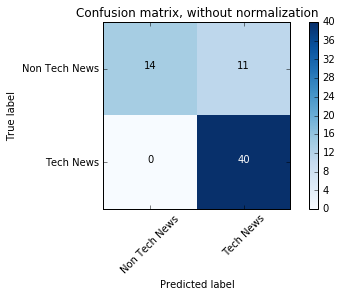

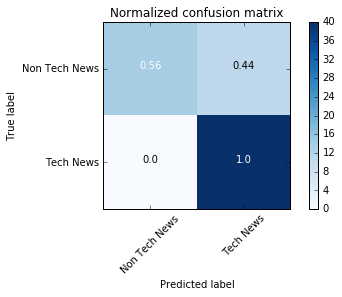

In [73]:
# GOOD = tech
# BAD = nonTech
techClassifier = Classifier()

for text in nonTechTexts:
    techClassifier.train(text, BAD)
    
for text in techTexts:
    techClassifier.train(text, GOOD)
    
countTechTP = 0
countNonTechFN =0
label1 = []
prediction1 = []
a = []
for texts in testTextsTech:
    label1.append('GOOD')
    a.append(techClassifier.getPropabilities(texts))
    #print techClassifier.getPropabilities(texts)
    if techClassifier.classification(texts) == GOOD:
        prediction1.append('GOOD')
        countTechTP +=1
    else:
        prediction1.append('BAD')
        countNonTechFN +=1

        
print 'Elemente in Testset Tech: %d ' % len(testTextsTech)
print 'Einordnung nicht Tech (FN): %d, Einordnung Tech (TP): %d' % (countNonTechFN, countTechTP)
print ''

# GOOD = tech
# BAD = nonTech
techClassifier = Classifier()

for text in nonTechTexts:
    techClassifier.train(text, BAD)
    
for text in techTexts:
    techClassifier.train(text, GOOD)
    
countTechFP = 0
countNonTechTN =0
label2 = []
prediction2=[]
a = []
for texts in testTextsNonTech:
    label2.append('BAD')
    a.append(techClassifier.getPropabilities(texts))
    #print techClassifier.getPropabilities(texts)
    if techClassifier.classification(texts) == GOOD:
        prediction2.append('GOOD')
        countTechFP +=1
    else:
        prediction2.append('BAD')
        countNonTechTN +=1

labels = []
label1.extend(label2)
labels = label1

prediction = []
prediction1.extend(prediction2)
prediction = prediction1
        
print 'Elemente in Testset nicht Tech: %d ' % len(testTextsNonTech)
print 'Einordnung nicht Tech (TN): %d, Einordnung Tech (FP): %d' % (countNonTechTN, countTechFP)
print ''

accuracy = (float(countTechTP) + float(countNonTechTN))/(float(countTechTP) + float(countNonTechTN) + float(countTechFP) + float(countNonTechFN))
print 'Accuracy: %f' % accuracy
print ''

precision = float(countTechTP)/(float(countTechTP)+float(countTechFP))
print 'Precision: %f' % precision
print ''

recall = float(countTechTP)/(float(countTechTP)+float(countNonTechFN))
print 'Recall: %f' % recall
print ''

fMeasure = (precision*recall)/(precision+recall)
print 'F-Measure: %f' % fMeasure
print ''

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
%matplotlib inline

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(labels, prediction)
np.set_printoptions(precision=2)

class_names = ['Non Tech News', 'Tech News']


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## Diskussion der Ergebnisse

Der Naive Bayes Classifier erkennt sehr gut Texte über Technologie, der Recall Messwert liegt daher bei ca 97%-100%.
Ihn als 'Spamfilter' einzusetzen ist sehr gut möglich, denn wichtig für einen Spamfilter ist das richtige Einsortieren von 'guten'-Mails (in unserem Fall technik News), damit sie nicht ignoriert werden.

Die gute Erkennung von Technologietexten kann durch Schlagwörter, die ausschließlich in Techniktexten vorkommen hervorgerufen werden beispielsweise, Grafikkarte, Arbeitsspeicher etc.

Nicht technik Texte werden ca. zu 60% korrekt, und 40% falsch, zugerordnet (deutlich in der Confusion Matrix erkennbar).
Die schlechtere Zurodnung von nicht technik Texten wird vermutlich durch Schlagwörter hervorgerufen die oft im allgemeinen Sprachgebrauch und in Techniktexten vorkommen, z.b. Computer, Facebook oder Amazon.

Insgesamt liegt die Accuracy bei ca. 84% welches ein guter Wert ist und 34% besser als der Zufall mit 50%, der Classifier hat auf jeden fall gelernt Klassen zu unterscheiden.

